In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_xml('data/export.xml')
df.to_csv('data/export.csv', index=False)

In [94]:
data = pd.read_csv("data/export.csv")
data

/var/folders/j6/hnb1wkw115x3893s7581k7s40000gn/T/ipykernel_75050/2140728767.py:1: DtypeWarning: Columns (0,1,2,3,4,5,8,9,13,15,17,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/export.csv")


,value,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse,type,sourceName,sourceVersion,unit,...,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal,HeartRateVariabilityMetadataList
0,2025-05-31 19:35:31 +0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2003-04-02,HKBiologicalSexMale,HKBloodTypeNotSet,HKFitzpatrickSkinTypeNotSet,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,174,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeight,iPhone de Eliandro Melo,11.0.1,cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,180,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeight,Health,12.3.1,cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,181,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeight,Health,13.1.3,cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377981,53.4268,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Eliandro’s Apple Watch,11.0,ms,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377982,28.667,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Eliandro’s Apple Watch,11.0,ms,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377983,30.8445,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Eliandro’s Apple Watch,11.0,ms,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377984,32.1236,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Eliandro’s Apple Watch,11.0,ms,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Lets' remove all the data that does not come from Eliandro

In [95]:
data.sourceName.value_counts()

Eliandro’s Apple Watch     642690
iPhone de Eliandro         385372
Apple Watch de Eliandro    239918
iPhone de Rosa              55430
iPhone de Eliandro Melo     53508
Clock                          41
Health                          4
8fit                            2
30 Day Fitness                  1
Name: sourceName, dtype: int64

In [96]:
data = data[data.sourceName != 'iPhone de Rosa']
data.sourceName.value_counts()

Eliandro’s Apple Watch     642690
iPhone de Eliandro         385372
Apple Watch de Eliandro    239918
iPhone de Eliandro Melo     53508
Clock                          41
Health                          4
8fit                            2
30 Day Fitness                  1
Name: sourceName, dtype: int64

##### Let's check only the Iphone's Data

In [97]:
data = data[data['sourceName'].isin(['iPhone de Eliandro', 'iPhone de Eliandro Melo'])]
data

,value,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse,type,sourceName,sourceVersion,unit,...,activeEnergyBurned,activeEnergyBurnedGoal,activeEnergyBurnedUnit,appleMoveTime,appleMoveTimeGoal,appleExerciseTime,appleExerciseTimeGoal,appleStandHours,appleStandHoursGoal,HeartRateVariabilityMetadataList
2,174,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierHeight,iPhone de Eliandro Melo,11.0.1,cm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,66,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierBodyMass,iPhone de Eliandro Melo,11.0.1,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,70,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierBodyMass,iPhone de Eliandro,17.0.2,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141465,323,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierStepCount,iPhone de Eliandro Melo,10.3.3,count,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141466,100,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierStepCount,iPhone de Eliandro Melo,10.3.3,count,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367036,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN,NaN,NaN,HKCategoryTypeIdentifierSleepAnalysis,iPhone de Eliandro,17.2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367037,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN,NaN,NaN,HKCategoryTypeIdentifierSleepAnalysis,iPhone de Eliandro,17.2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367038,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN,NaN,NaN,HKCategoryTypeIdentifierSleepAnalysis,iPhone de Eliandro,17.2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367039,HKCategoryValueSleepAnalysisInBed,NaN,NaN,NaN,NaN,NaN,HKCategoryTypeIdentifierSleepAnalysis,iPhone de Eliandro,17.3.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Features computed by the phone

In [154]:
list(data.type.unique())

['HKQuantityTypeIdentifierHeight',
 'HKQuantityTypeIdentifierBodyMass',
 'HKQuantityTypeIdentifierStepCount',
 'HKQuantityTypeIdentifierDistanceWalkingRunning',
 'HKQuantityTypeIdentifierFlightsClimbed',
 'HKQuantityTypeIdentifierHeadphoneAudioExposure',
 'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
 'HKQuantityTypeIdentifierSixMinuteWalkTestDistance',
 'HKQuantityTypeIdentifierWalkingSpeed',
 'HKQuantityTypeIdentifierWalkingStepLength',
 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage',
 'HKQuantityTypeIdentifierAppleWalkingSteadiness',
 'HKCategoryTypeIdentifierSleepAnalysis']

### Analyzing Step Count, a quantity sample type that measures the number of steps the user has taken.

In [104]:
df = data[data.type == 'HKQuantityTypeIdentifierStepCount'][['endDate', 'value']]

df.value = df.value.astype('int32')
df.endDate = pd.to_datetime(df.endDate)
df

,endDate,value
141465,2017-08-30 11:40:48+02:00,323
141466,2017-08-30 21:18:22+02:00,100
141467,2017-08-30 21:22:31+02:00,85
141468,2017-08-30 22:13:08+02:00,20
141469,2017-08-30 23:33:56+02:00,63
...,...,...
262135,2025-05-31 18:28:52+02:00,241
262136,2025-05-31 18:37:12+02:00,262
262137,2025-05-31 18:44:29+02:00,43
262138,2025-05-31 19:06:43+02:00,243


##### When checking the step count over time, we can note that we have an extreme outlier. Is this a measurement error?

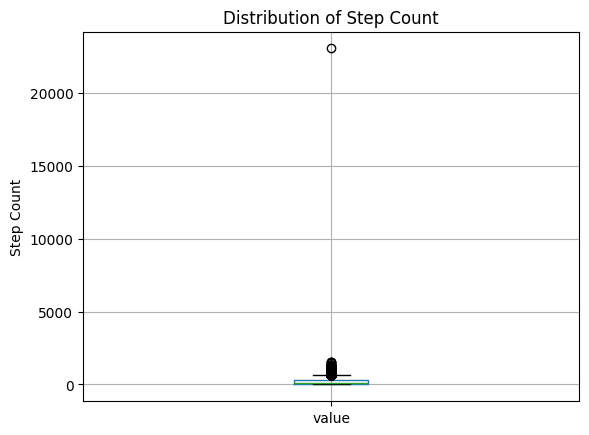

In [105]:
df.boxplot(column='value')
plt.ylabel('Step Count')  
plt.title('Distribution of Step Count')
plt.show()

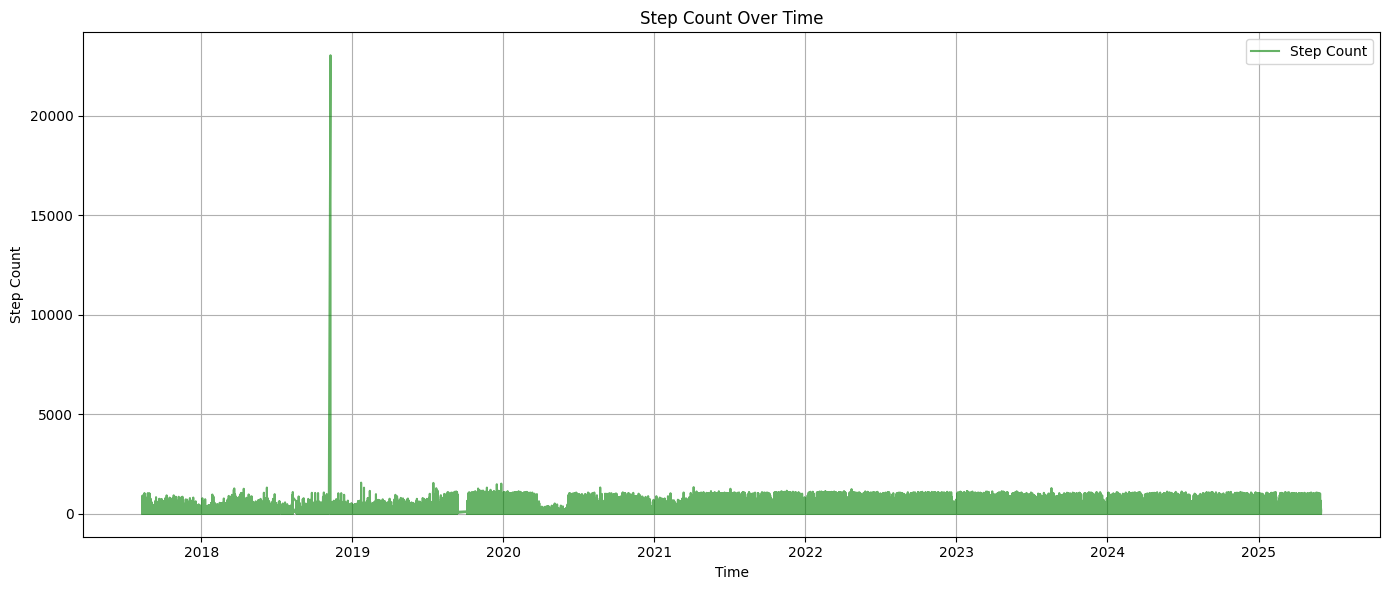

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['endDate'], df['value'], label='Step Count', color='green', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Step Count')
plt.title('Step Count Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


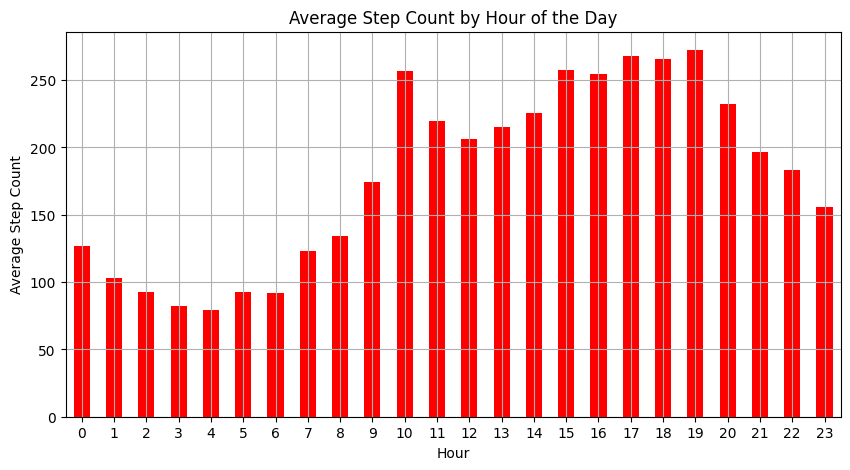

In [107]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Average Step Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Step Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


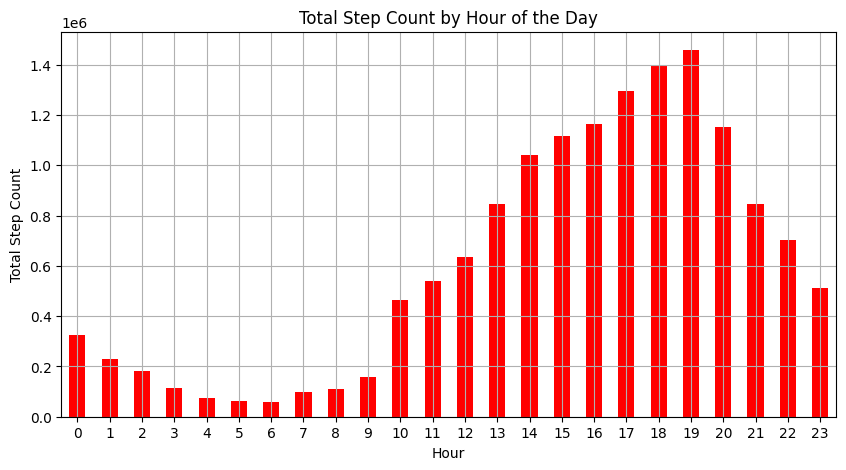

In [108]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].sum()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Total Step Count by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Step Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


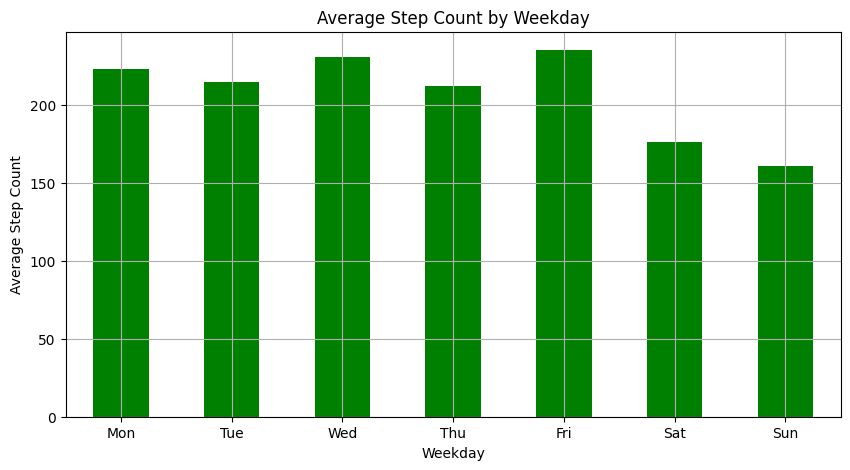

In [109]:
# Extract weekday from endDate 
df['weekday'] = df['endDate'].dt.dayofweek

# Map to weekday names for better readability
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])

# Calculate average step count per weekday
weekly_avg = df.groupby('weekday_name')['value'].mean().reindex(weekday_names)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='green')
plt.title('Average Step Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Step Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


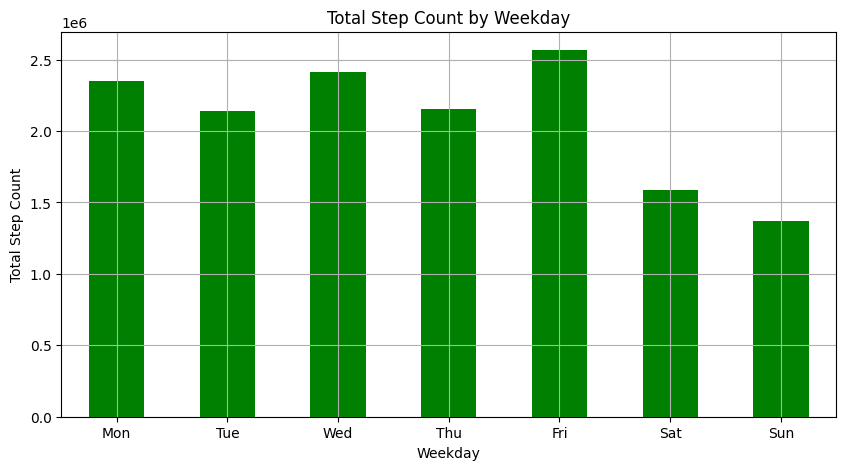

In [110]:
# Extract weekday from endDate 
df['weekday'] = df['endDate'].dt.dayofweek

# Map to weekday names for better readability
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])

# Calculate average step count per weekday
weekly_avg = df.groupby('weekday_name')['value'].sum().reindex(weekday_names)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='green')
plt.title('Total Step Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Step Count')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


#### Analyzing Distance Walking Running, a quantity sample type that measures the distance the user has moved by walking or running.

In [137]:
df = data[data.type == 'HKQuantityTypeIdentifierDistanceWalkingRunning'][['endDate', 'value']]

df.value = df.value.astype('int32')
df.endDate = pd.to_datetime(df.endDate)
df

,endDate,value
288006,2017-08-30 11:40:48+02:00,0
288007,2017-08-30 21:18:22+02:00,0
288008,2017-08-30 21:22:31+02:00,0
288009,2017-08-30 22:13:08+02:00,0
288010,2017-08-30 23:33:56+02:00,0
...,...,...
443957,2025-05-31 18:28:52+02:00,0
443958,2025-05-31 18:37:12+02:00,0
443959,2025-05-31 18:44:29+02:00,0
443960,2025-05-31 19:06:43+02:00,0


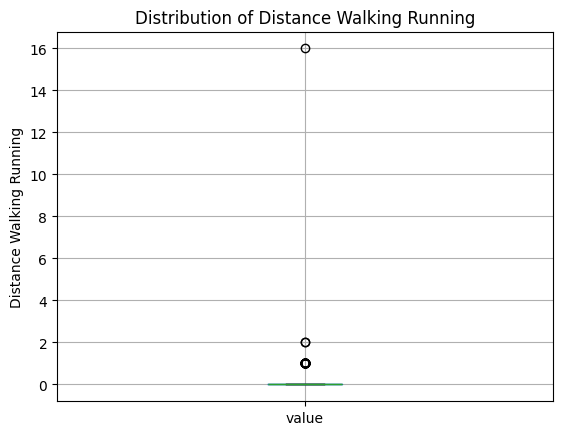

In [138]:
df.boxplot(column='value')
plt.ylabel('Distance Walking Running')  
plt.title('Distribution of Distance Walking Running')
plt.show()

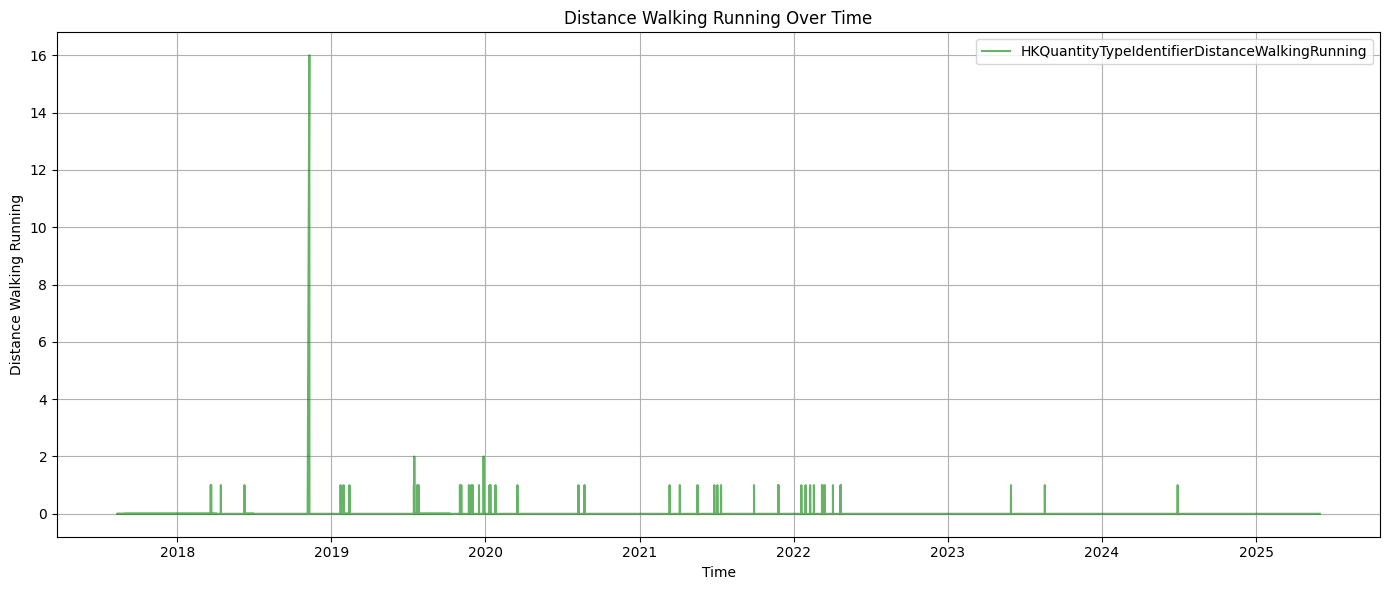

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['endDate'], df['value'], label='HKQuantityTypeIdentifierDistanceWalkingRunning', color='green', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Distance Walking Running')
plt.title('Distance Walking Running Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


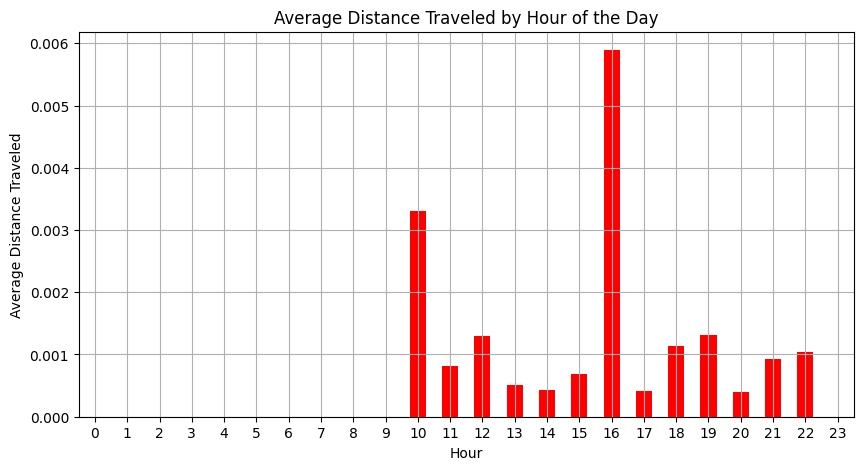

In [140]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Average Distance Traveled by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Distance Traveled')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


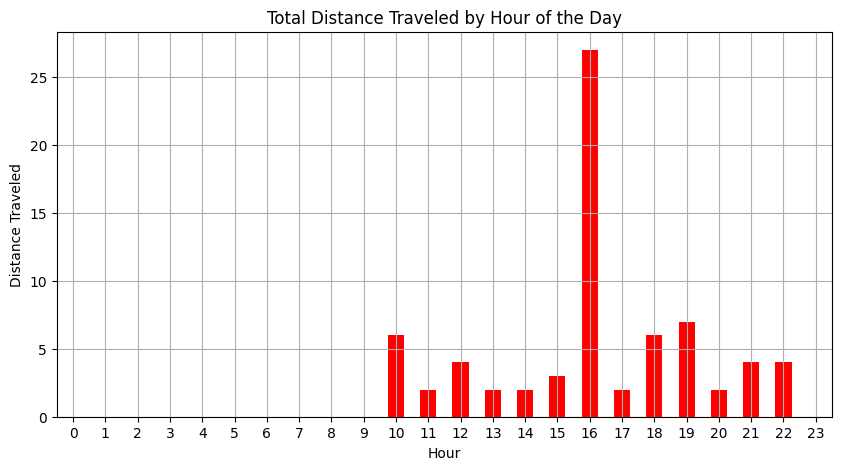

In [141]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].sum()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Total Distance Traveled by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Distance Traveled')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


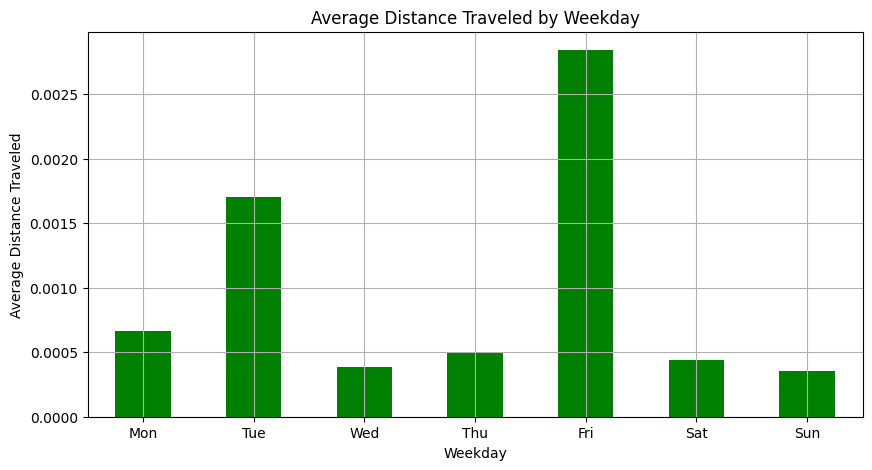

In [142]:
# Extract weekday from endDate 
df['weekday'] = df['endDate'].dt.dayofweek

# Map to weekday names for better readability
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])

# Calculate average step count per weekday
weekly_avg = df.groupby('weekday_name')['value'].mean().reindex(weekday_names)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='green')
plt.title('Average Distance Traveled by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Distance Traveled')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


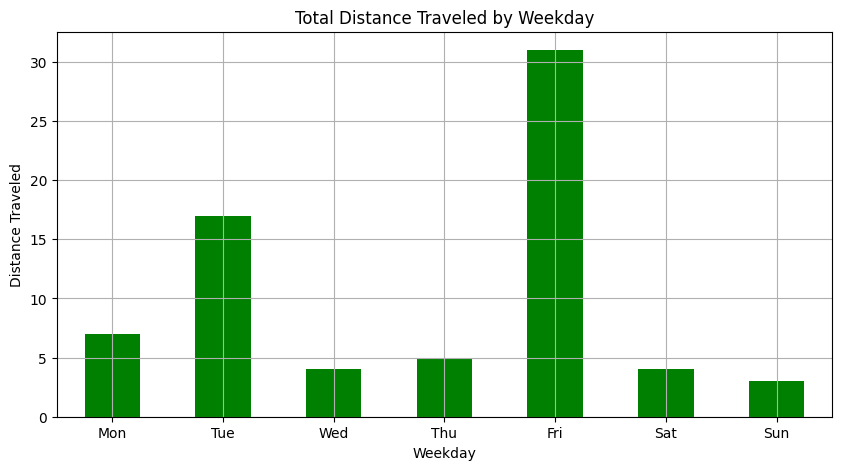

In [143]:
# Extract weekday from endDate 
df['weekday'] = df['endDate'].dt.dayofweek

# Map to weekday names for better readability
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])

# Calculate average step count per weekday
weekly_avg = df.groupby('weekday_name')['value'].sum().reindex(weekday_names)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='green')
plt.title('Total Distance Traveled by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Distance Traveled')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


### Analyzing Headphone Audio Exposure, a quantity sample type that measures audio exposure from headphones.

In [144]:
df = data[data.type == 'HKQuantityTypeIdentifierHeadphoneAudioExposure'][['endDate', 'value']]

df.value = df.value.astype('int32')
df.endDate = pd.to_datetime(df.endDate)
df

,endDate,value
969148,2019-10-21 16:21:39+02:00,84
969149,2019-10-21 16:21:55+02:00,80
969150,2019-10-21 16:40:12+02:00,81
969151,2019-10-21 16:43:47+02:00,79
969152,2019-10-21 17:25:33+02:00,69
...,...,...
1092971,2025-05-31 16:33:44+02:00,60
1092972,2025-05-31 16:40:21+02:00,67
1092973,2025-05-31 16:40:24+02:00,72
1092974,2025-05-31 16:49:37+02:00,74


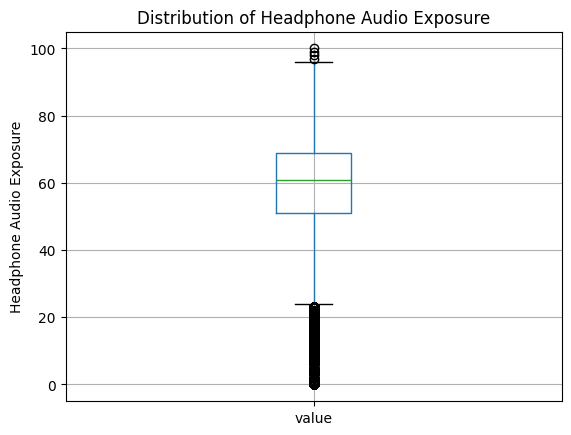

In [145]:
df.boxplot(column='value')
plt.ylabel('Headphone Audio Exposure')  
plt.title('Distribution of Headphone Audio Exposure')
plt.show()

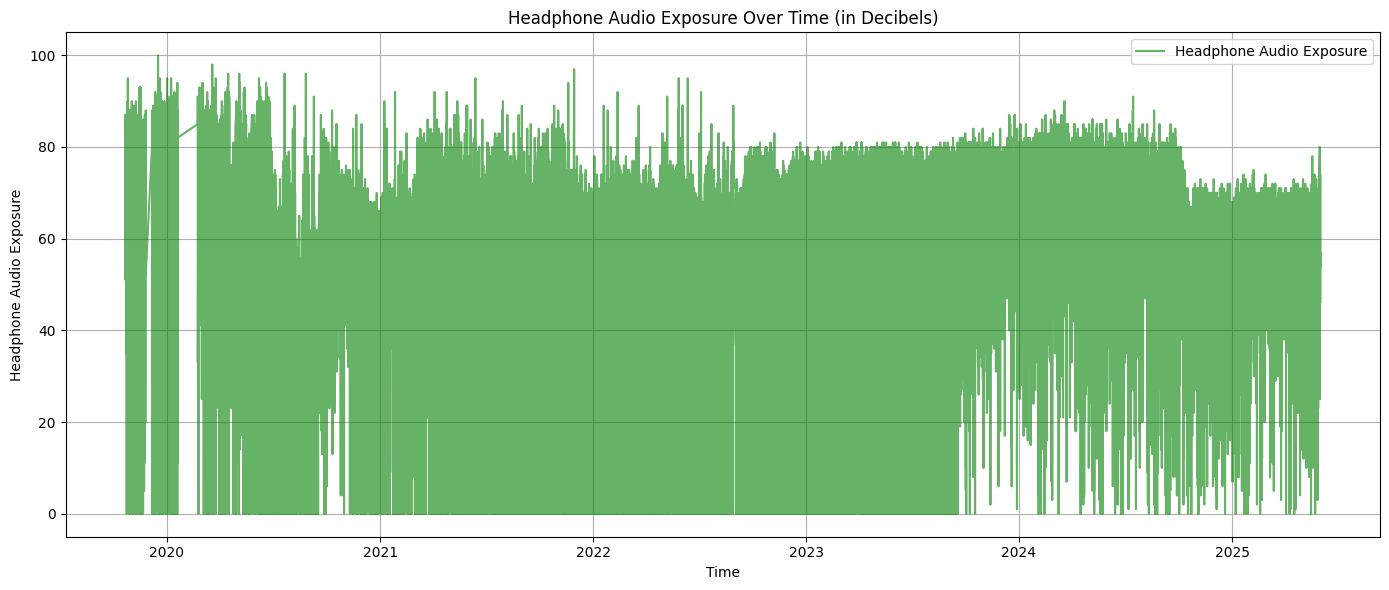

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['endDate'], df['value'], label='Headphone Audio Exposure', color='green', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Headphone Audio Exposure')
plt.title('Headphone Audio Exposure Over Time (in Decibels)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


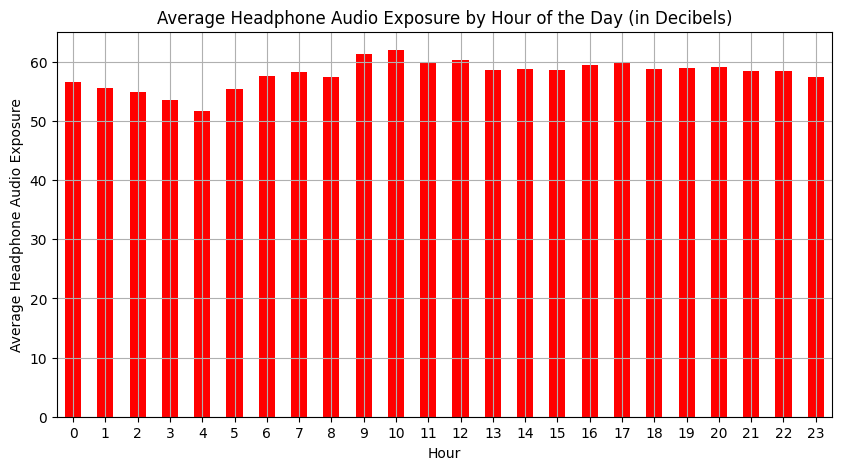

In [147]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Average Headphone Audio Exposure by Hour of the Day (in Decibels)')
plt.xlabel('Hour')
plt.ylabel('Average Headphone Audio Exposure')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


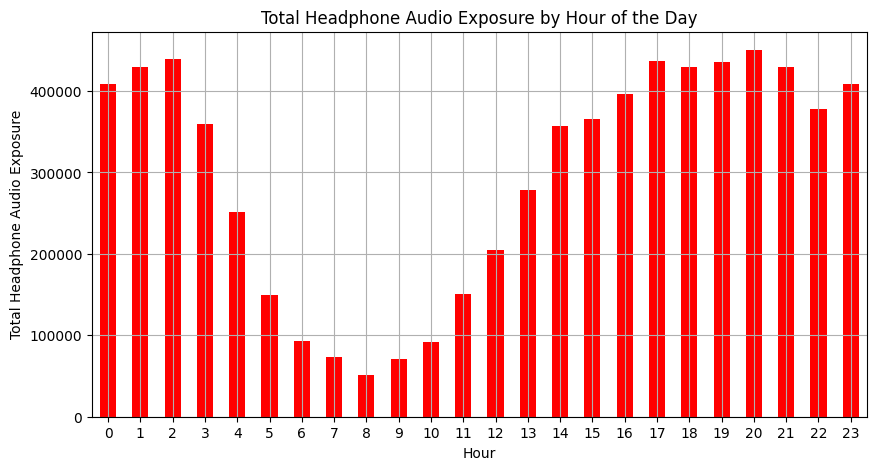

In [ ]:
df['hour'] = df['endDate'].dt.hour
hourly_avg = df.groupby('hour')['value'].sum()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='red')
plt.title('Total Headphone Audio Exposure by Hour of the Day (in Decibels)')
plt.xlabel('Hour')
plt.ylabel('Total Headphone Audio Exposure')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


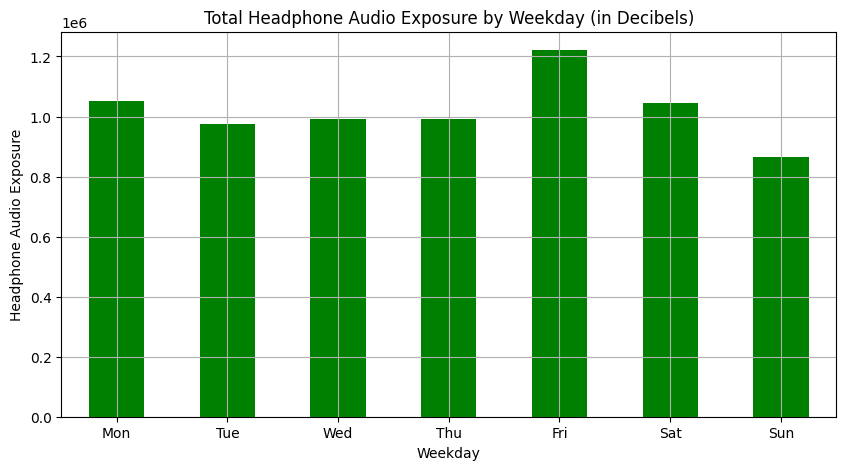

In [151]:
# Extract weekday from endDate 
df['weekday'] = df['endDate'].dt.dayofweek

# Map to weekday names for better readability
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['weekday_name'] = df['weekday'].map(lambda x: weekday_names[x])

# Calculate average step count per weekday
weekly_avg = df.groupby('weekday_name')['value'].sum().reindex(weekday_names)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
weekly_avg.plot(kind='bar', color='green')
plt.title('Total Headphone Audio Exposure by Weekday (in Decibels)')
plt.xlabel('Weekday')
plt.ylabel('Headphone Audio Exposure')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()
